# Travail personnel 1 : Pendule double et Runge Kutta
## Safae Ben Ayad & Maxime Langlet
## 13 Novembre 2018


Dans ce travail, nous nous intéressons au problème du pendule double.
Il s'agit d'un premier pendule à l'extrémité duquel on accroche un deuxième pendule. Chacun des deux pendules est constitué lui-même d'un barreau de longueur $l$ et de masse $m$, le tout constitu donc le pendule double. 

On cherche à résoudre les équations du mouvement du pendule simple, pour ce faire nous allons tout d'abord décrire ce système grâce au formalisme lagrangien.

$\underline{Remarque}$: Nous allons prendre nos axes de manière à que y croise vers le haut et x croise vers la droite.

Par définition du Langragien $L$ vaut: $$L = K - V $$ 

où $K = \frac{1}{2}m(v^2)_1 + \frac{1}{2}m(v^2)_2$ l'énergie cinétique du pendule
et $V = mg(y_1 + y_2)$ l'énergie potentiel du pendule. 


In [26]:
import numpy as np
import math
from matplotlib import pyplot
%matplotlib inline
from matplotlib import animation
import scipy.integrate as integrate
import matplotlib.animation as animation
from IPython.display import HTML

In [3]:
x1 = l/2*np.sin(a1) 
y1 = -l/2*np.cos(a1)


x2 = l*(np.sin(a1)+l/2*np.sin(a2))
y2 = -l*(np.cos(a1)+l/2*np.cos(a2))


b1=6/(m*l**2)*(2*pa1-3*np.cos(a1-a2)*pa2)/(16-9*np.cos(a1-a2)**2)
b2=6/(m*l**2)*(8*pa2-3*np.cos(a1-a2)*pa1)/(16-9*np.cos(a1-a2)**2)


pa1 = 1/6*m*l**2(8*b1+3*b2*np.cos(a1-a2))
pa2 = 1/6*m*l**2(2*b2+3*b1*np.cos(a1-a2))




L = 1/6*m*l**2*(b2**2+4*b1**2+3*b1*b2*np.cos(a1-a2))-1/2*m*g*l*(3*np.cos(a1)+np.cos(a2))


qa1 = -1/2*m*l**2*(b1*b2*np.sin(a1-a2)+3*g/l*np.sin(a1))
qa2 = -1/2*m*l**2*(-b1*b2*np.sin(a1-a2)+g/l*np.sin(a2))

NameError: name 'l' is not defined

In [5]:
#Données/Conditions initiales
l=1     #longueur
m=1     #masse
g=9.81
a10=math.pi/2   #theta1 val initiale
a20=math.pi/2   #theta2 val initiale
pa10=0          #impulsion1 val initiale
pa20=0          #impulsion2 val initiale
t0=0
T = 20.0  # length of the time interval
dt = 0.001  # time-step size
N = int(T / dt) + 1  # number of time steps
u0 = np.array([a10,a20,pa10,pa20])


#On def f comme la fonction f(u)=u'
#u etant la liste nos variables
#u' la liste des derivées (stockées dans results) 

def f(u):
    a1=u[0]
    a2=u[1]
    pa1=u[2]
    pa2=u[3]   
    b1=6/(m*l**2)*(2*pa1-3*np.cos(a1-a2)*pa2)/(16-9*np.cos(a1-a2)**2)   #derivée de théta1
    b2=6/(m*l**2)*(8*pa2-3*np.cos(a1-a2)*pa1)/(16-9*np.cos(a1-a2)**2)   #derivée de théta2
    qa1 = -1/2*m*l**2*(b1*b2*np.sin(a1-a2)+3*g/l*np.sin(a1))            #dérivée de l'imp 1
    qa2 = -1/2*m*l**2*(-b1*b2*np.sin(a1-a2)+g/l*np.sin(a2))             #dérivée de l'imp 2
    result = np.array([b1,b2,qa1,qa2])                  #liste des derivées de nos variables
    return result


def RK4(f,u0,dt,T,t0):
    N = int(T / dt) + 1 
    
    tv = np.zeros(N)      # liste de 0's pour stocker les valeurs des dt(intervalles de temps)
    uv = np.zeros((N,4))    # matrice Nx4 de 0's pour stocker les solutions 
                          # en chaque ligne les differentes 4 variable pour un time-step 
                          # 4 variables (une par colonne) theta1, theta2, impul1, impul2
            
    tv[0]=t0              
    uv[0]=u0
    for i in range(1,N):
        k1=dt*f(uv[i-1])
        k2=dt*f(uv[i-1]+k1/2)
        k3=dt*f(uv[i-1]+k2/2)
        k4=dt*f(uv[i-1]+k3)
        
        #on crée liste us de 4élem avec les valeurs de uv qui change pour chaque dt (par R-K)
        us = uv[i-1] + 1/6*(k1+2*k2+2*k3+k4) 
        
        tv[i] = tv[i-1]+dt      #on stocke dans tv
        uv[i] = us              #on rempli uv avec la liste us
    return(tv,uv)

In [6]:
"Convertions en coordonées cartésiennes"
solutions = RK4(f,u0,0.001,20,0)
#tvs = solutions[0]             
uvs = solutions[1]

x1 = np.zeros(N)      #nouvelles listes de 0's taille N
y1 = np.zeros(N)
x2 = np.zeros(N)
y2 = np.zeros(N)

for i in range(N):
    x1[i] = l*np.sin(uvs[i][0])
    y1[i] = -l*np.cos(uvs[i][0])
    x2[i] = l*(np.sin(uvs[i][0]) + np.sin( uvs[i][1] ))
    y2[i] = -l*(np.cos( uvs[i][0] ) + np.cos( uvs[i][1] ))
print( x1[N-1], y1[N-1], x2[N-1], y2[N-1])

0.6626895606587564 -0.748894215623211 0.06008961250572198 0.04914920580569859


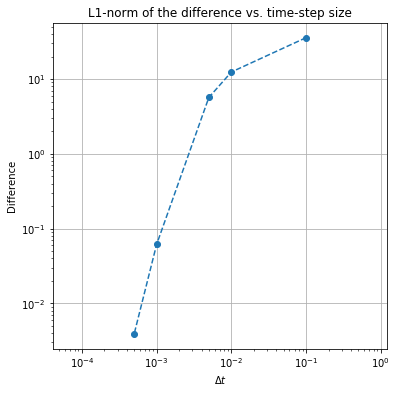

In [36]:
# Create an empty list to store the difference in the solution
# between two consecutive grids.
# Compute the differences in the x-position for all grids.
dt_values = [0.1,0.01,0.005,0.001,0.0005,0.00025]
u_values = []    #liste de zeros

for dt in dt_values:
    sol = RK4(f,u0,dt,T,t0)[1]
    u_values.append(sol) 

dt_values = [0.1,0.01,0.005,0.001,0.0005,0.00025]
diff_values = []
for y, dt in zip(u_values, dt_values):
    diff = l1_diff(y[:, 2], u_values[-1][:, 2], dt)   
    diff_values.append(diff)
    

# Plot difference versus the time-step size.
pyplot.figure(figsize=(6.0, 6.0))
pyplot.title('L1-norm of the difference vs. time-step size')
pyplot.xlabel('$\Delta t$')
pyplot.ylabel('Difference')
pyplot.grid()
pyplot.loglog(dt_values[:-1], diff_values[:-1],
              color='C0', linestyle='--', marker='o')
pyplot.axis('equal');

In [35]:
"Ordre de convergence(normalement 4 je sais pas ou est l'erreur)"

def l1_diff(u_coarse, u_fine, dt):
    """
    Returns the difference in the L1-norm between the solution on
    a coarse grid and the solution on a fine grid.
    
    Parameters
    ----------
    u_coarse : numpy.ndarray
        Solution on the coarse grid as a 1D array of floats.
    u_fine : numpy.ndarray
        Solution on the fine grid as a 1D array of floats.
    dt : float
        Time-step size.
    
    Returns
    -------
    diff : float
        The difference between the two solution in the L1-norm
        scaled by the time-step size.
    """
    N_coarse = u_coarse.shape[0]
    N_fine = u_fine.shape[0]
    ratio = math.ceil(N_fine / N_coarse)
    diff = dt * np.sum(np.abs(u_coarse - u_fine[::ratio]))
    return diff

r = 2  # time-step size refinement ratio
h = 0.001  # finest time-step size
t0 = 0
T = 20

dt_values = [h,h*r,h*r**2]
u_values = []    #liste de zeros
diffgrid2 = np.zeros(2)
for dt in dt_values:
    sol = RK4(f,u0,dt,T,t0)[1]
    u_values.append(sol) 
    
#calcul de f2 - f1
diffgrid2[0] = l1_diff(u_values[1], u_values[0], dt_values[1])

#calcul de f3 - f2
diffgrid2[1] = l1_diff(u_values[2], u_values[1], dt_values[2])

# calcul de l'ordre de convergence
p = (np.log(diffgrid2[1]) - np.log(diffgrid2[0])) / np.log(r)

print('L ordre de convergence est p = {:.3f}'.format(p));

L ordre de convergence est p = 3.024


In [33]:
"on voit que quand on diminue les times-steps on augmente l'ordre, je sais pas si c est normal, en ttout cas 
"j'arrive pas a tomber sur 4 directement"
r = 2  # time-step size refinement ratio
h = 0.001  # finest time-step size
t0 = 0
T = 20

dt_values = [h/4,h/2,h]
u_values = []    #liste de zeros

for dt in dt_values:
    sol = RK4(f,u0,dt,T,t0)[1]
    u_values.append(sol) 

    
# Calculate f2 - f1.
f2_f1 = l1_diff(u_values[1], u_values[0], dt_values[1])
# Calculate f3 - f2.
f3_f2 = l1_diff(u_values[2], u_values[1], dt_values[2])
# Calculate the observed order of convergence.
p = math.log(f3_f2 / f2_f1) / math.log(r)
print('Observed order of convergence: p = {:.3f}'.format(p))

Observed order of convergence: p = 3.880


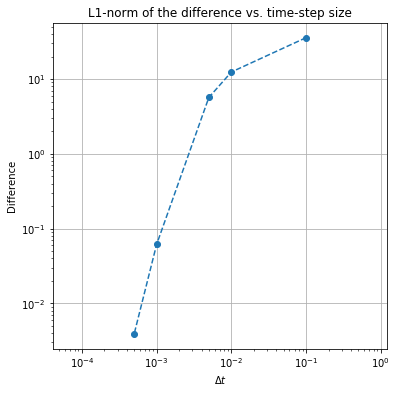

In [8]:
# Create an empty list to store the difference in the solution
# between two consecutive grids.
# Compute the differences in the x-position for all grids.
dt_values = [0.1,0.01,0.005,0.001,0.0005,0.00025]
u_values = []    #liste de zeros

for dt in dt_values:
    sol = RK4(f,u0,dt,T,t0)[1]
    u_values.append(sol) 

dt_values = [0.1,0.01,0.005,0.001,0.0005,0.00025]
diff_values = []
for y, dt in zip(u_values, dt_values):
    diff = l1_diff(y[:, 2], u_values[-1][:, 2], dt)   
    diff_values.append(diff)
    

# Plot difference versus the time-step size.
pyplot.figure(figsize=(6.0, 6.0))
pyplot.title('L1-norm of the difference vs. time-step size')
pyplot.xlabel('$\Delta t$')
pyplot.ylabel('Difference')
pyplot.grid()
pyplot.loglog(dt_values[:-1], diff_values[:-1],
              color='C0', linestyle='--', marker='o')
pyplot.axis('equal');

RuntimeError: Requested MovieWriter (ffmpeg) not available

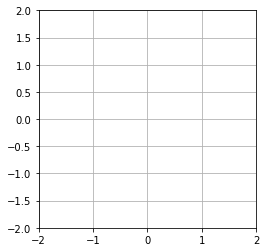

In [9]:
"reste du travail"

t=20
data = solutions
fig = pyplot.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()
pyplot.gca().set_aspect('equal', adjustable='box')

line, = ax.plot([], [], 'r-', lw=3)
extremity, = ax.plot([], [], 'black', lw=1)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    thisx = [0, x1[i*t], x2[i*t]]
    thisy = [0, y1[i*t], y2[i*t]]
    line.set_data(thisx, thisy)
    extremity.set_data(x2[:i*t+1], y2[:i*t+1])
    time_text.set_text(time_template % (data[0][i*t]))
    return extremity, line, time_text

anim = animation.FuncAnimation(fig, animate, init_func=init,frames=int(len(data[1])), interval=20, blit=True)
#anim.save("double_pendulum.mp4", fps=fact*5/2)
HTML(anim.to_html5_video())

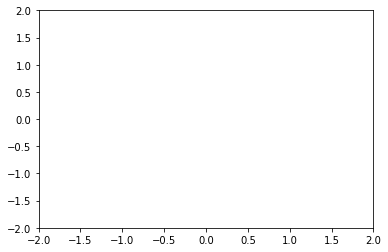

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

k = 2*np.pi
w = 2*np.pi
dt = 0.01
t=20
xmin = -2
xmax = 2
nbx = 100

x = np.linspace(xmin, xmax, nbx)

fig = plt.figure() # initialise la figure
line, = plt.plot([],[],'r-',lw=3) 
plt.xlim(xmin, xmax)
plt.ylim(-2,2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

# fonction à définir quand blit=True
# crée l'arrière de l'animation qui sera présent sur chaque image
def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i): 
    t = i * dt
    y = np.cos(k*x - w*t)
    thisx = [0, x1[i*t], x2[i*t]]
    thisy = [0, y1[i*t], y2[i*t]]
    line.set_data(thisx, thisy)
    extremity.set_data(x2[:i*t+1], y2[:i*t+1])
    time_text.set_text(time_template % (data[0][i*t]))
    return extremity, line, time_text
 
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=100, blit=True, interval=0.001, repeat=True)

plt.show()

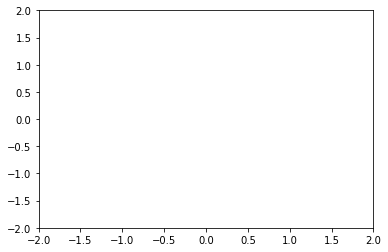

In [14]:
fig = pyplot.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
                              interval=25, blit=True, init_func=init, repeat=True)

#ani.save('double_pendulum.mp4', fps=15)
pyplot.show()